<a href="https://colab.research.google.com/github/AmadeusEsparza/Data-Science/blob/main/AN%C3%81LISIS%20DE%20TAMA%C3%91O%20DE%20MERCADO%20DE%20VEH%C3%8DCULOS%20EL%C3%89CTRICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO: ANÁLISIS DE TAMAÑO DE MERCADO DE VEHÍCULOS ELÉCTRICOS**

El análisis del tamaño del mercado es un aspecto crucial de la investigación de mercado que determina el volumen potencial de ventas dentro de un mercado determinado. Ayuda a las empresas a comprender la magnitud de la demanda, evaluar los niveles de saturación del mercado e identificar oportunidades de crecimiento. En este proyecto, Iicill lo llevará a través de la tarea de análisis de tamaño de mercado de Vehículos Eléctricos usando Python.

El análisis de tamaño de mercado para vehículos eléctricos implica un proceso de varios pasos que incluye definir el alcance del mercado, recopilar y preparar datos, modelar analíticamente y comunicar los hallazgos a través de visualización e informes. A continuación se muestra el proceso que puede seguir para la tarea de análisis de tamaño de mercado de vehículos eléctricos:

1.   Definir si el análisis es global, regional o centrado en países específicos.
2.   Recopilar información de asociaciones de la industria, empresas de investigación de mercado (por ejemplo, BloombergNEF, AIE) y publicaciones gubernamentales relevantes para el mercado de EV*.
3.   Utilice datos históricos para identificar tendencias en ventas, producción y mercado de EV*.
4.   Analice el tamaño del mercado y las tasas de crecimiento para diferentes segmentos de EV*.
5.   Según el análisis del tamaño del mercado, proporcione recomendaciones estratégicas para las empresas que buscan ingresar o expandirse en el mercado de EV* a través de predicciones.

_*EV significa Electric Vehicles_

Por lo tanto, necesitamos un conjunto de datos adecuado para la tarea de análisis del tamaño del mercado de los vehículos eléctricos.

Puede descargar el conjunto de datos desde [aquí](https://docs.google.com/spreadsheets/d/1EvSrAe5JUoDUjU4x8Mm43q41Zecnov0wL4h8BbOT18M/edit?usp=drive_link) y acá tienes [más información](https://statso.io/market-size-of-evs-case-study/) sorbe el dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/Data Scientist/Electric_Vehicle_Population_Data - Electric_Vehicle_Population_Data.csv.csv"
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

Verificamos que nuestro data set no tenga ningun valor nulo

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Eliminamos cualquier valor null por 0

In [ ]:
df = df.dropna()

En base a los datos de 'County' y 'State' se puede apreciar que el enfoque esta mayormente centrado en Estados Unidos.


In [ ]:
df['County'].unique()

array(['King', 'Snohomish', 'Kitsap', 'Thurston', 'Yakima', 'Island',
       'Chelan', 'Skagit', 'Spokane', 'Walla Walla', 'Grant', 'Stevens',
       'Whitman', 'Kittitas', 'Pend Oreille', 'Clark', 'Cowlitz',
       'Jefferson', 'Clallam', 'Klickitat', 'Pierce', 'Grays Harbor',
       'Whatcom', 'Skamania', 'Wahkiakum', 'Benton', 'Franklin', 'Lewis',
       'San Juan', 'Mason', 'Okanogan', 'Douglas', 'Adams', 'Pacific',
       'Asotin', 'Columbia', 'Lincoln', 'Ferry', 'Garfield'], dtype=object)

In [ ]:
df['State'].unique()

array(['WA'], dtype=object)

<ipython-input-26-7e76c2789f80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_adoption_by_year.index, y=df_adoption_by_year.values, palette="viridis")


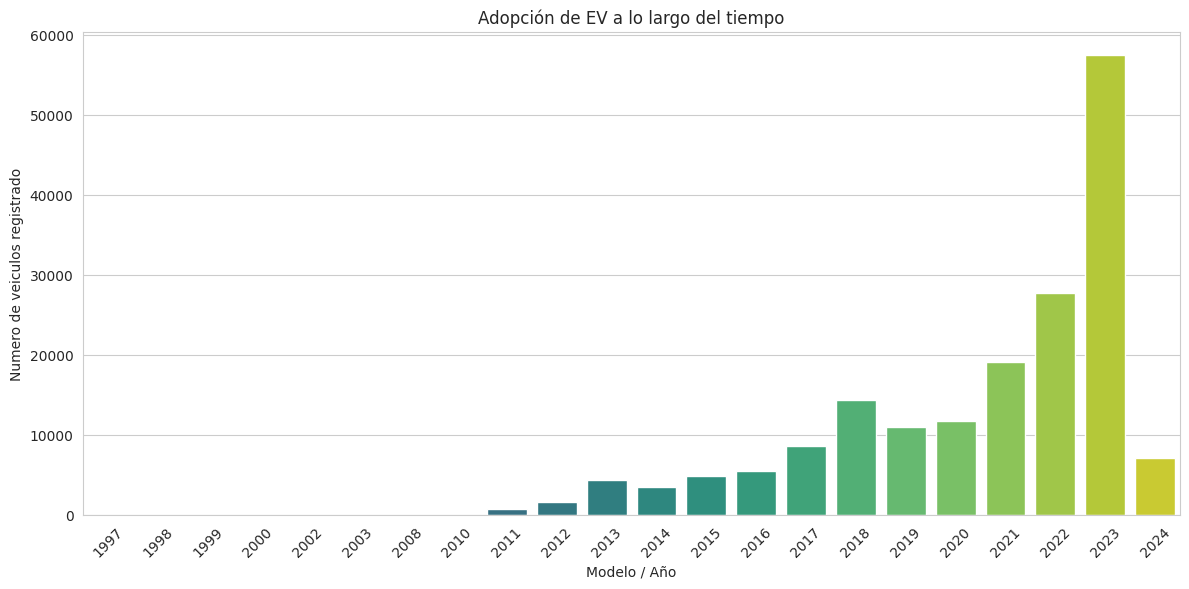

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
df_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=df_adoption_by_year.index, y=df_adoption_by_year.values, palette="viridis")
plt.title('Adopción de EV a lo largo del tiempo')
plt.xlabel('Modelo / Año')
plt.ylabel('Numero de veiculos registrado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir del año 2016 se ve un incremento en el numero de veiculos registrados, sobretodo en el año 2023 se muestra un gran incremento de EV registrados.

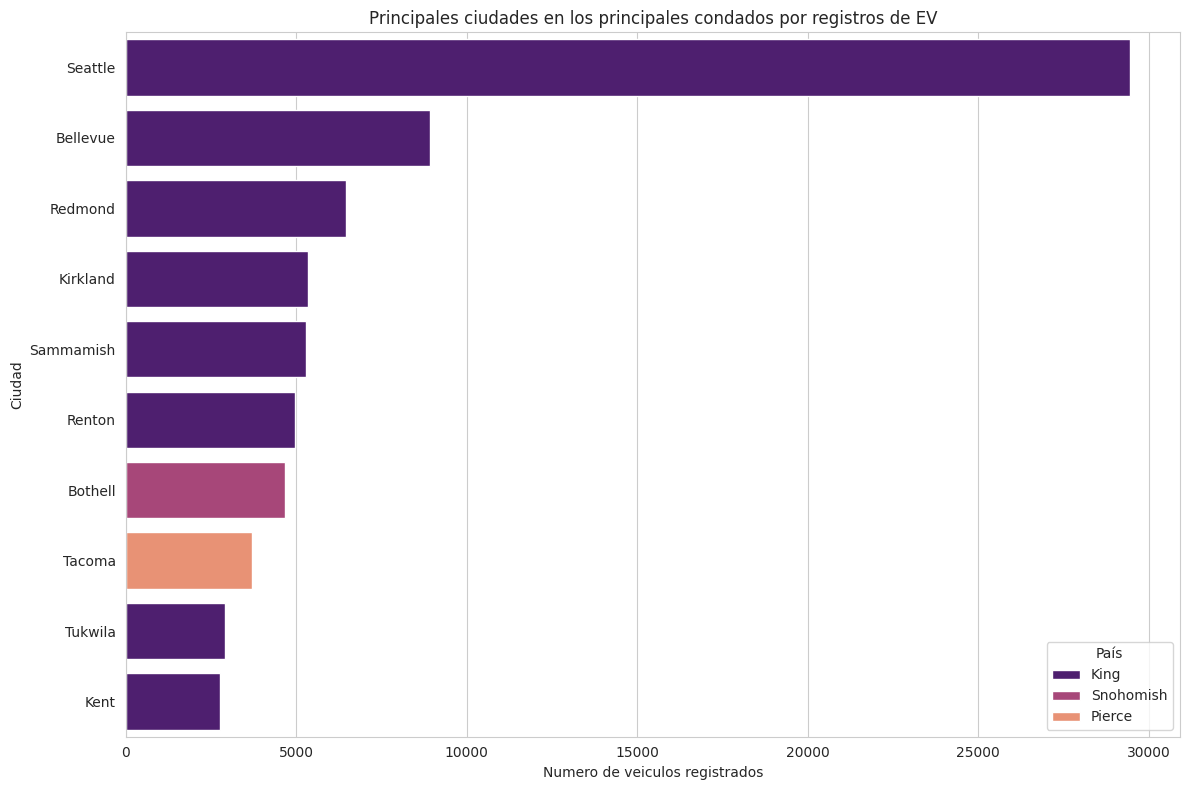

In [ ]:
# distribución geográfica a nivel de condado
df_county_distribution = df['County'].value_counts()
top_counties = df_county_distribution.head(3).index

# filtrar el conjunto de datos para estos condados principales
top_counties_data = df[df['County'].isin(top_counties)]

# Analizar la distribución de vehículos eléctricos dentro de las ciudades de estos condados principales.
df_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizar las 10 principales ciudades de estos condados
top_cities = df_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Principales ciudades en los principales condados por registros de EV')
plt.xlabel('Numero de veiculos registrados')
plt.ylabel('Ciudad')
plt.legend(title='País')
plt.tight_layout()
plt.show()

La grafica de arriba representa el numero de EV registrados en varias ciudades dentro de tres condados: King, Snohomish, and Pierce.

Las barras horizontales representan ciudades y su longitud corresponde al número de vehículos matriculados, codificados por colores por condado.

<ipython-input-28-572655bad9d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_type_distribution.values, y=df_type_distribution.index, palette="rocket")


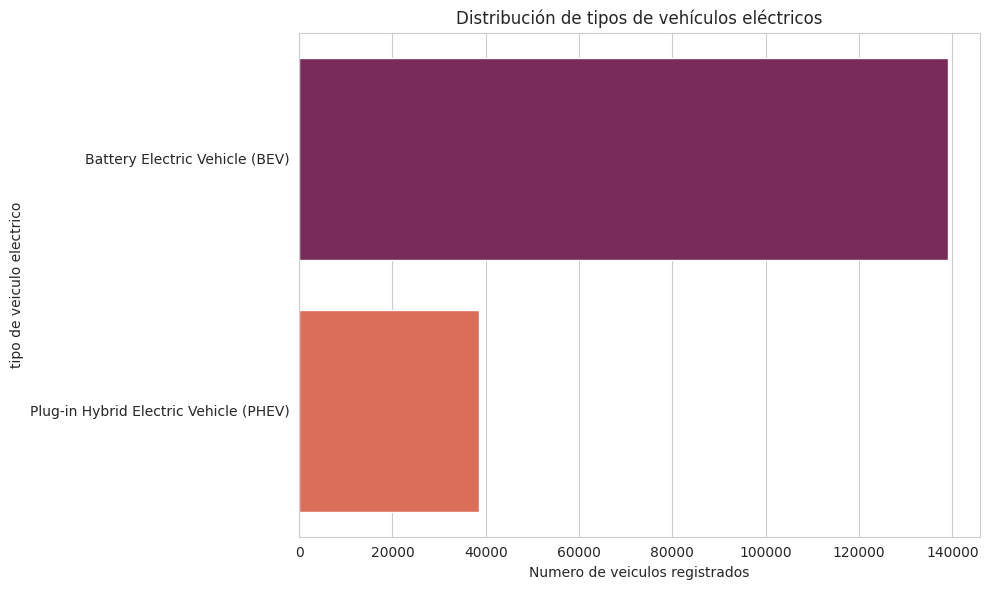

In [ ]:
# analyzing the distribution of electric vehicle Types
df_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_type_distribution.values, y=df_type_distribution.index, palette="rocket")
plt.title('Distribución de tipos de vehículos eléctricos')
plt.xlabel('Numero de veiculos registrados')
plt.ylabel('tipo de veiculo electrico')
plt.tight_layout()
plt.show()

En la grafica de arriba se puede apreciar que los (BEV) son más populares o preferidos que los Hibridos (PHEV)
entre los vehículos eléctricos matriculados en Estados Unidos.

<ipython-input-30-4e0cc7913d03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_make_distribution.values, y=df_make_distribution.index, palette="cubehelix")


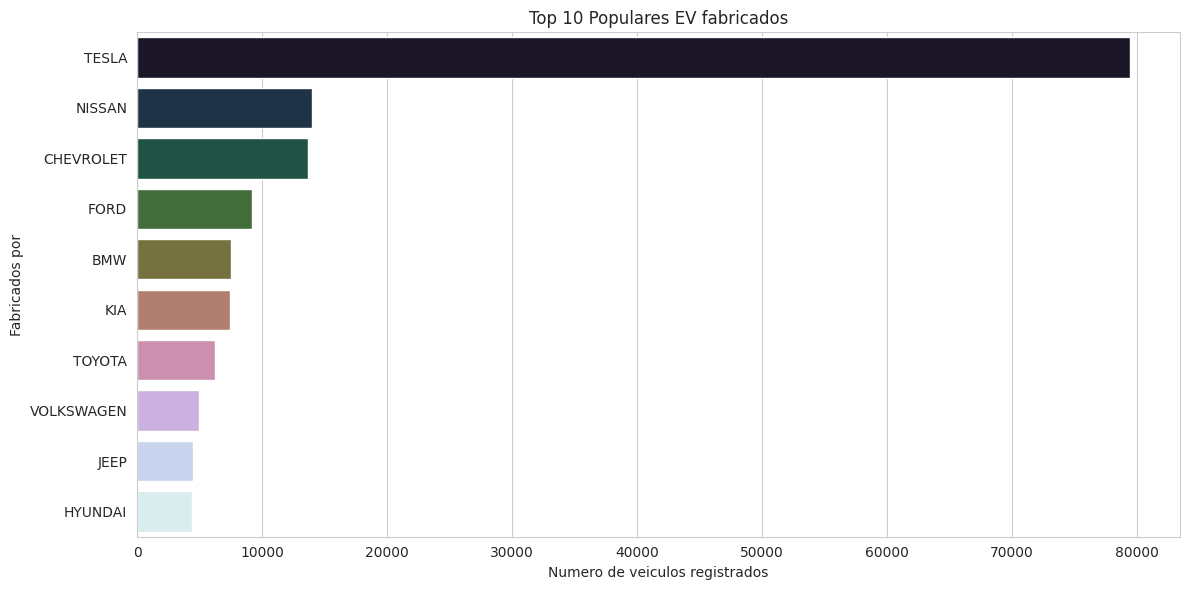

In [ ]:
df_make_distribution = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_make_distribution.values, y=df_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Populares EV fabricados')
plt.xlabel('Numero de veiculos registrados')
plt.ylabel('Fabricados por')
plt.tight_layout()
plt.show()

TESLA lidera por un gran margen con el mayor número de vehículos matriculados.

NISSAN es el segundo fabricante más popular, seguido de CHEVROLET, aunque ambos tienen menos matriculaciones que TESLA.

Le siguen FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP y HYUNDAI en orden decreciente de vehículos matriculados.

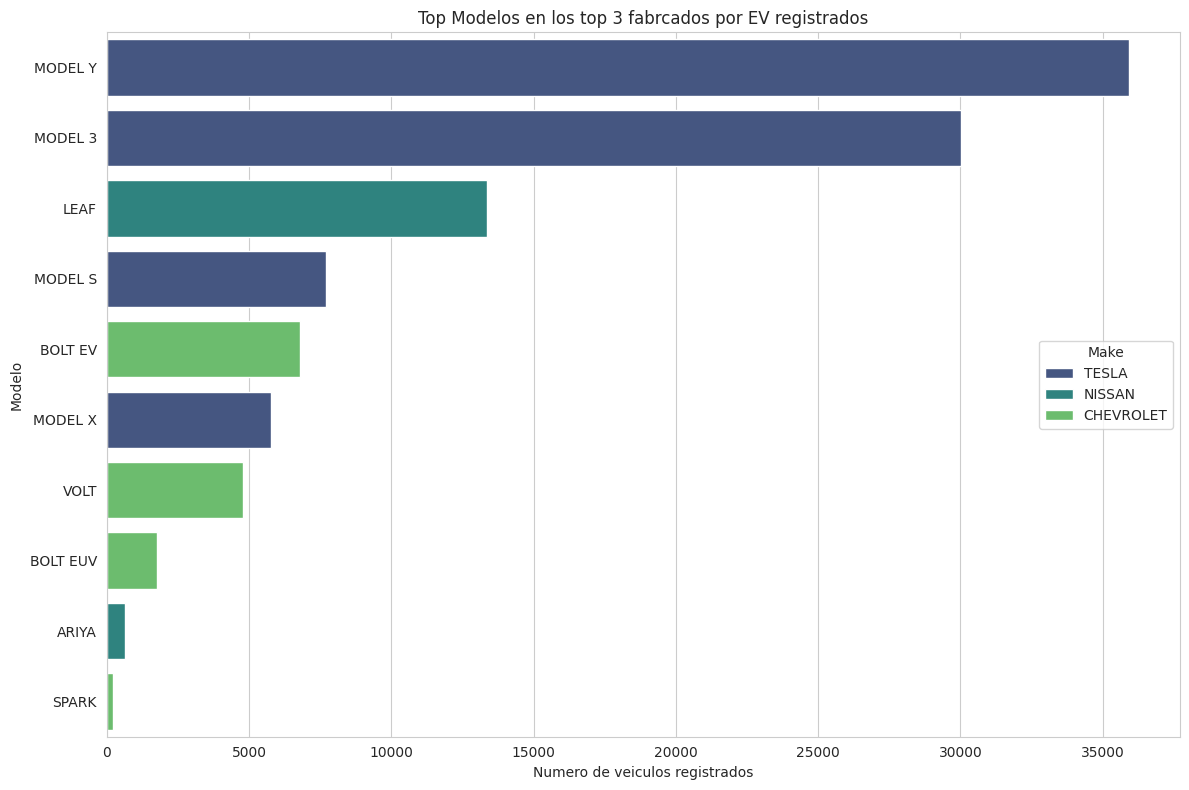

In [ ]:
top_3_makes = df_make_distribution.head(3).index


top_makes_data = df[df['Make'].isin(top_3_makes)]


df_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


top_models = df_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Modelos en los top 3 fabrcados por EV registrados')
plt.xlabel('Numero de veiculos registrados')
plt.ylabel('Modelo')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

El gráfico anterior muestra la distribución de matriculaciones de vehículos eléctricos entre los diferentes modelos de los tres principales fabricantes: TESLA, NISSAN y CHEVROLET.

El MODELO Y y el MODELO 3 de TESLA son los vehículos más matriculados, siendo el MODELO Y el que tiene el mayor número de matriculaciones.
El LEAF de NISSAN es el tercer modelo más registrado y el vehículo no TESLA más registrado.

**Análisis estimado del tamaño del mercado de vehículos eléctricos en los Estados Unidos**

In [ ]:
df_registration_counts = df['Model Year'].value_counts().sort_index()
df_registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


El conjunto de datos proporciona el número de vehículos eléctricos matriculados cada año desde 1997 hasta 2024.

In [ ]:
from scipy.optimize import curve_fit
import numpy as np


filtered_years = df_registration_counts[df_registration_counts.index <= 2023]


def exp_growth(x, a, b):
    return a * np.exp(b * x)

x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values


params, covariance = curve_fit(exp_growth, x_data, y_data)


forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)


forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


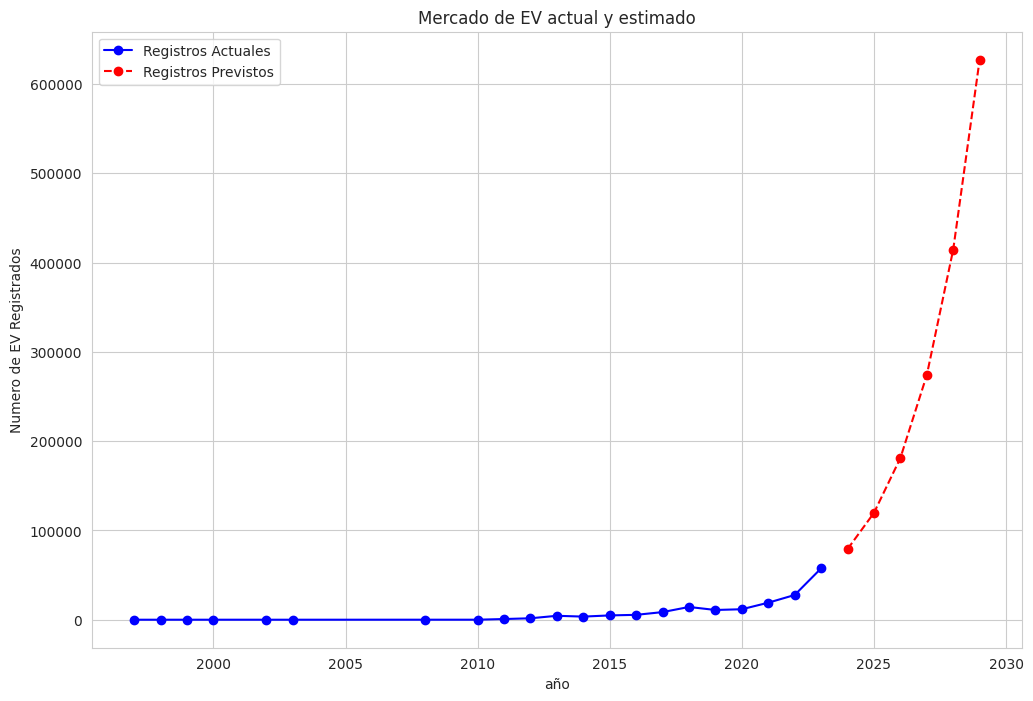

In [ ]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Registros Actuales')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Registros Previstos')

plt.title('Mercado de EV actual y estimado')
plt.xlabel('año')
plt.ylabel('Numero de EV Registrados')
plt.legend()
plt.grid(True)

plt.show()

Podemos concluir que se espera que el tamaño del mercado de EV se expanda considerablemente.

El fuerte aumento de las matriculaciones previstas sugiere que la adopción de vehículos eléctricos por parte de los consumidores está en aumento, y es probable que esta tendencia continúe.

En general, los datos apuntan hacia un futuro prometedor para la industria de los vehículos eléctricos, lo que indica un cambio significativo en las preferencias de los consumidores y un aumento potencial de las inversiones y oportunidades comerciales relacionadas.

Sobretodo los tres principales fabricantes: TESLA, NISSAN y CHEVROLET.

Tendran un mayor volumen de ventas en los proximos 6 años, principalmente en los veiculos 100% electricos los cuales vienen siendo los (BEV)